# Capstone Project- Data Science Precourse
## Tiani Calip

### Data Set Background:
This data set provides key health, nutrition and population statistics gathered from a variety of international sources that were compiled into The World Bank.
This data set includes 345 indicators, such as immunization rates, malnutrition prevalence, and vitamin A supplementation rates across 263 countries around the world. Data was collected on a yearly basis from 1960-2015.

Some downsides to using this data include:

-There are many NaN (missing) values

- This means that there might be missing data that is needed to understand the health and population statistics of certain countries

Some benefits of using this data include:

-There is a large sample size of data (365 indicators and 263 countries)

-It is very interesting because there are a variety of  techniques (hypothesis testing, predictive analysis, visualizations, etc.) that can be used to answer different research questions about the health of the global population.

### Personal Interest in the Data Set:
My boyfriend's family escaped Vietnam during the Vietnamese War before he was born, back in the early 1970s. I always wondered what it would have been like if David's family had stayed, survived during the war times, and he was born there. I wondered, if he had been born in Vietnam, what are the chances he would have survived until age 5? What would David's life expectancy have been if he had been born in Vietnam and did live past 5 years old? Has the life expectancy in Vietnam changed since the war ended? I plan on comparing various indicators of health and survival rates of the Vietnamese and United States populations. 

### As I looked more into the data...
I became fascinated by the unexpected drops or spikes in the indicators of health that had to do with life expectancy, under-5 mortality rate (U5MR), and different immunizations, and asked myself 3 analytical questions:
1. Is the dip in life expectancy of Vietnamese people in the early 1970s correlated to increased child mortality rates?
2. Is there a correlation between life expectancy and U5MR?
3. Is it possible that immunizations in children under-5 could have helped to decrease the U5MR?

In [1]:
# import all the modules I need
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

# import in the data table I downloaded from Kaggle
df = pd.DataFrame()
df = pd.read_csv("health_nutrition.csv")

## Let's take a look at all the indicators The World Bank has been collecting since 1960

In [3]:
df['Indicator Name'].unique()

array(['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Adults (ages 15+) and children (0-14 years) living with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15+) living with HIV',
       'Adults (ages 15+) newly infected with HIV',
       'Age at first marriage, female', 'Age at first marriage, male',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 0, female, interpolated',
       'Age population, age 0, male, interpolated',
       'Age population, age 01, female, interpolated',
       'Age population, age 01, male, interpolated',
       'Age popula

## Wow! That's a lot of data to look at! However, not all of it is filled out. I know that there's some missing data (marked by NaN). So, let me look at what indicators there are that have data for Vietnam specifically

In [4]:
# determine what I can look at in Vietnam. There are so many "NaN" statements!
Countries = ['Vietnam']
dfv = df[df['Country Name'].isin(Countries)]
pd.options.display.max_rows = 999
pd.options.display.max_columns = 61
dfv

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
86940,Vietnam,VNM,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.490000e+01,NaN,NaN,NaN,NaN,3.870000e+01,3.840000e+01,NaN,NaN,NaN,NaN,4.510000e+01,NaN,NaN,4.340000e+01,NaN,NaN
86941,Vietnam,VNM,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.090000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86942,Vietnam,VNM,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1.902520e+01,1.917860e+01,1.933200e+01,1.936000e+01,1.938800e+01,1.941600e+01,1.944400e+01,1.947200e+01,1.938980e+01,1.930760e+01,1.922540e+01,1.914320e+01,1.906100e+01,1.901260e+01,1.896420e+01,1.891580e+01,1.886740e+01,1.881900e+01,1.930760e+01,1.979620e+01,2.028480e+01,2.077340e+01,2.126200e+01,2.234840e+01,2.343480e+01,2.452120e+01,2.560760e+01,2.669400e+01,2.811680e+01,2.953960e+01,3.096240e+01,3.238520e+01,3.380800e+01,3.299620e+01,3.218440e+01,3.137260e+01,3.056080e+01,2.974900e+01,2.938120e+01,2.901340e+01,2.864560e+01,2.827780e+01,2.791000e+01,2.848720e+01,2.906440e+01,2.964160e+01,3.021880e+01,3.079600e+01,3.184900e+01,3.290200e+01,3.395500e+01,3.500800e+01,3.606100e+01,3.709020e+01,3.811940e+01,NaN,NaN
86943,Vietnam,VNM,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+02,1.000000e+03,1.500000e+03,3.100000e+03,6.400000e+03,1.300000e+04,2.300000e+04,3.900000e+04,5.900000e+04,8.000000e+04,1.000000e+05,1.200000e+05,1.400000e+05,1.600000e+05,1.800000e+05,1.900000e+05,2.000000e+05,2.100000e+05,2.200000e+05,2.300000e+05,2.300000e+05,2.400000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.600000e+05,NaN
86944,Vietnam,VNM,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+02,5.000000e+02,1.000000e+03,1.700000e+03,3.400000e+03,6.600000e+03,1.200000e+04,1.700000e+04,2.200000e+04,2.500000e+04,2.600000e+04,2.700000e+04,2.800000e+04,2.800000e+04,2.600000e+04,2.500000e+04,2.400000e+04,2.200000e+04,2.100000e+04,1.900000e+04,1.900000e+04,1.800000e+04,1.700000e+04,1.600000e+04,1.500000e+04,1.400000e+04,NaN
86945,Vietnam,VNM,Adults (ages 15+) living with HIV,SH.DYN.AIDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+02,1.000000e+03,1.500000e+03,3.100000e+03,6.300000e+03,1.300000e+04,2.300000e+04,3.900000e+04,5.900000e+04,8.000000e+04,1.000000e+05,1.200000e+05,1.400000e+05,1.600000e+05,1.700000e+05,1.900000e+05,2.000000e+05,2.100000e+05,2.100000e+05,2.200000e+05,2.300000e+05,2.400000e+05,2.400000e+05,2.400000e+05,2.500000e+05,2.500000e+05,NaN
86946,Vietnam,VNM,Adults (ages 15+) newly infected with HIV,SH.HIV.INCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+02,5.000000e+02,1.000000e+03,1.700000e+03,3.400000e+03,6.500000e+03,1.100000e+04,1.700000e+04,2.100000e+04,2.400000e+04,2.600000e+04,2.700000e+04,2.800000e+04,2.700000e+04,2.500000e+04,2.400000e+04,2.300000e+04,2.100000e+04,2.000000e+04,1.900000e+04,1.800000e+04,1.700000e+04,1.600000e+04,1.500000e+04,1.500000e+04,1.400000e+04,NaN
86947,Vietnam,VNM

## As I mentioned before, I'd like to look at specific countries and health indicators. The two steps above helped me identify what to call specifically

Exploring this data set helped me to see that many interesting things happened in Vietnam after the war ended. As you'll see in my data exploration below, there were surprising changes in life expectancies and in immunization prevalence. 

I would like to see how immunizations possibly changed in prevalence and if that affected the survival of children under 5 at all. I know that Vietnam is not as developed as the US on many fronts, especially in healthcare, so it would be interesting to compare the two on these terms too.

   Indicators of Health that I would like to compare between Vietnam and USA:
       - 'Life expectancy at birth, total (years)'
       - 'Mortality rate, under-5 (per 1,000)' (U5MR)
       - 'Immunization, DPT (% of children ages 12-23 months)'
       - 'Immunization, measles (% of children ages 12-23 months)'
       - 'Immunization, Pol3 (% of one-year-old children)'

In [5]:
# narrow down countries and indicators to what I want to view
Countries = ['Vietnam', 'United States']
Indicators = ['Life expectancy at birth, total (years)',
              'Immunization, DPT (% of children ages 12-23 months)',
              'Immunization, measles (% of children ages 12-23 months)',
              'Immunization, Pol3 (% of one-year-old children)',
              'Mortality rate, under-5 (per 1,000)']
dft = df[df['Indicator Name'].isin(
    Indicators) & df['Country Name'].isin(Countries)]

In [6]:
# drop the columns I don't want
dft = dft.drop(['Country Code', 'Indicator Code', 'Unnamed: 60'], axis=1)

### Here's the new data frame that contains only my indicators and countries of interest:

In [7]:
# melt the columns together so that I just have one column for year and a bunch of rows with specific indicators for every year 1960-2015
dft = pd.melt(dft, id_vars=['Country Name', 'Indicator Name'], var_name='Year')

# rename columns and check what it looks like
dft.rename(columns={'Country Name': 'Country'}, inplace=True)
dft.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft

,Country,Indicator,Year,value
0,United States,"Immunization, DPT (% of children ages 12-23 mo...",1960,NaN
1,United States,"Immunization, measles (% of children ages 12-2...",1960,NaN
2,United States,"Immunization, Pol3 (% of one-year-old children)",1960,NaN
3,United States,"Life expectancy at birth, total (years)",1960,69.770732
4,United States,"Mortality rate, under-5 (per 1,000)",1960,30.100000
5,Vietnam,"Immunization, DPT (% of children ages 12-23 mo...",1960,NaN
6,Vietnam,"Immunization, measles (% of children ages 12-2...",1960,NaN
7,Vietnam,"Immunization, Pol3 (% of one-year-old children)",1960,NaN
8,Vietnam,"Life expectancy at birth, total (years)",1960,59.067024
9,Vietnam,"Mortality rate, under-5 (per 1,000)",1960,NaN


### I'm curious to compare each countries' average value of each of those indicators over the 55 year range

In [8]:
# group by country and indicator so that I can see the avg for each indicator 1960-2015
dft.groupby(['Country', 'Indicator'])['value'].mean()

Country        Indicator                                              
United States  Immunization, DPT (% of children ages 12-23 months)        94.555556
               Immunization, Pol3 (% of one-year-old children)            91.250000
               Immunization, measles (% of children ages 12-23 months)    91.638889
               Life expectancy at birth, total (years)                    74.461774
               Mortality rate, under-5 (per 1,000)                        14.564286
Vietnam        Immunization, DPT (% of children ages 12-23 months)        81.454545
               Immunization, Pol3 (% of one-year-old children)            82.484848
               Immunization, measles (% of children ages 12-23 months)    79.088235
               Life expectancy at birth, total (years)                    68.188942
               Mortality rate, under-5 (per 1,000)                        53.759615
Name: value, dtype: float64

### Great! We can see a difference in immunizations, life expectancies, and mortality rate in the under-5 population between our populations. 

    - There is over 3x higher mortality rate in children under-5 in Vietnam than there is in the US! That's shocking!
    - Vietnam seems to have a lower percentage of immunizations for their children. 
    - Assuming there's a negative correlation between immunizations and mortality rate, 
    I would expect that their mortality rate for the young children would be higher than the US. 
    - Vietnam seems to have a lower life expectancy at birth for the total population than the US
    
### These are interesting findings! However, we need to run some further statistics on this to see if the differences are statistically significant (see further into the report as I break it down by health indicator).

standard deviation: an estimate of the average variability (spread) of a set of data measured in the same units of measurement as the original data.

standard error: an estimate equal to the standard deviation of the theoretical distribution of a large population of such estimates.

t-test: test if your data is significantly different from 0 or if two means are significantly different from each other. The lower the p-value that restults from the t-test, the more confidently we can conclude that there is a meaningful difference between the means of the two groups in the population.

### Let's make a plot to show the US vs. Vietnam comparison of life expectancy at birth (years) over time

Text(0.5,1,'US and Vietnam Life Expectancy at Birth Generally Increases with Time')

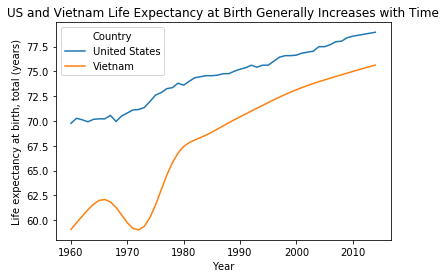

In [9]:
# le = life expectancy shorthand
# make a data frame with just this le indicator and both countries of interest. melt the years into one 'Year' column
dft_le = dft[dft['Indicator'] == 'Life expectancy at birth, total (years)']
dft_le = dft_le.pivot(index='Year', columns='Country', values='value')
dft_le.index = dft_le.index.astype(int)

# plot the data in a line chart and name the axes
ax = dft_le.plot()
ax.set_ylabel('Life expectancy at birth, total (years)')
ax.set_title(
    'US and Vietnam Life Expectancy at Birth Generally Increases with Time')

### Both countries seem to generally have an increase in life expectancy over time, but woooah! There's a dip in Vietnam's life expectancy in the early 1970's. Wonder why that is! 

Before we explore that dip, let's see if there is a meaningful difference between those two life expectancies.

In [77]:
# Check for Pearson Correlation
rho_le, p_le = pearsonr(
    dft_le[('United States')].dropna(), dft_le[('Vietnam')].dropna())
print('The Pearson Correlation Results are:')
print(rho_le, p_le)

The Pearson Correlation Results are:
0.9738023874589182 9.08523140775435e-36


The p-value is about 9.09e-36. This shows me I can confidently conclude there is a significant difference between the means of the life expectancies of the two countries.

To visualize that better, let's use a box plot to see the differences.

Text(0.5,1,'Life Expectancy at Birth, Total (years) is Higher in the US than in Vietnam')

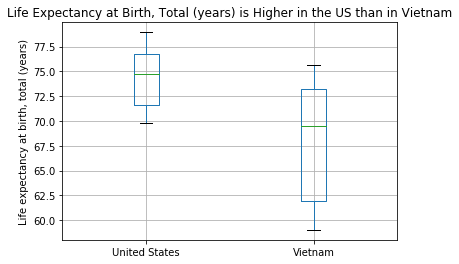

In [75]:
# Now let's plot a boxplot over the variables to see how large of a difference there is between the countries
ax = dft_le[['United States', 'Vietnam']].boxplot()
ax.set_ylabel('Life expectancy at birth, total (years)')
ax.set_title('Life Expectancy at Birth, Total (years) is Higher in the US than in Vietnam')

In [11]:
# table that has the compares the stats summaries for the average life expectancy (in years) over the 55 year range
dft_le.describe()

Country,United States,Vietnam
count,55.000000,55.000000
mean,74.461774,68.188942
std,2.895459,5.672938
min,69.770732,59.021610
25%,71.656098,61.919415
50%,74.765854,69.509585
75%,76.736585,73.259085
max,78.941463,75.629122


In [79]:
# US le standard error (se)
print('The se of US le is:')
print(np.std(dft_le['United States'], ddof=1) /
      np.sqrt(len(dft_le['United States'])))
print()  # adding a blank line to see the stats better

# Vietnam le se
print('The se of Vietnam le is:')
print(np.std(dft_le['Vietnam'], ddof=1) / np.sqrt(len(dft_le['Vietnam'])))
print()

# t-test
print('The US vs Vietnam le t-test results are:')
print(ttest_ind(dft_le['United States'].dropna(),
                dft_le['Vietnam'].dropna(), equal_var=False))

The se of US le is:
0.386921983291066

The se of Vietnam le is:
0.7580781788346906

The US vs Vietnam le t-test results are:
Ttest_indResult(statistic=7.3040614085139195, pvalue=1.8014774288261794e-10)


According to the statistics calculations above, we can see that the mean life expectancy at birth for the Vietnamese population is, on average for 1960-2015, lower than the mean life expectancy for the US population. The standard deviations calculated here show that Vietnam and the US have an overlap in life expectancy, which would suggest they are not that different from one another. However, looking at the standard error and Pearson test, and t-test for the populations challenges that notion. The standard errors do not overlap and the p-values are far from 0.05, suggesting that the US life expectancy is significantly higher than the life expectancy in Vietnam

Due to these calculations, I can make the broad guess that my David's life expectancy is higher from the life expectancy he would have had if he had been born in Vietnam in 1992 instead of the US. It's a good thing he wasn't born in the early 1970s in Vietnam! Again, I wonder why there's such a dip!

# *Is the dip in life expectancy of Vietnamese people in the early 1970s correlated to increased child mortality rates?

### It is possible that the life expectancy decreased in the early 1970s because there was a higher probability of dying as a child.
According to Eurostat, "the most commonly used indicator for analysing mortality is life expectancy at birth: the mean number of years that a person can expect to live at birth if subjected to current mortality conditions throughout the rest of his or her life. It is a simple but powerful way of illustrating the developments in mortality." http://ec.europa.eu/eurostat/statistics-explained/index.php/Mortality_and_life_expectancy_statistics 
### To check that, I will make a plot to show the data that compares Under-5 Mortality Rate (per 1,000) (U5MR) between the two countries of interest.
#### It would be interesting to see if there's a spike in the mortality rate for children under 5 years old in Vietnam during the early 1970s.

Text(0.5,1,"US and Vietnam's U5MR Decreases with Time")

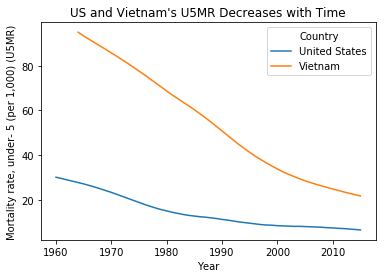

In [29]:
# first, make a data frame with just the 2 countries and the U5MR indicator
dft_u5mr = dft[dft['Indicator'] == 'Mortality rate, under-5 (per 1,000)']
dft_u5mr = dft_u5mr.pivot(index='Year', columns='Country', values='value')
dft_u5mr.index = dft_u5mr.index.astype(int)

# plot and rename axes
ax = dft_u5mr.plot()
ax.set_ylabel('Mortality rate, under- 5 (per 1,000) (U5MR)')
ax.set_title('US and Vietnam\'s U5MR Decreases with Time')

### Visualization interpretation:
Both countries seem to have a general decrease in U5MR as time progresses. The US U5MR is consistently lower than the U5MR of Vietnam and I need to do some visualizations and stats to see if it is a significant difference.

Also, note that there is no spike in U5MR in Vietnam during the early 1970s. 
- That means that dip in life expectancy in those years is not correlated with the U5MR.

In [80]:
# Check for Pearson Correlation
rho_u5mr, p_u5mr = pearsonr(
    dft_u5mr[('United States')].dropna(), dft_u5mr[('Vietnam')].dropna())
print('The Pearson Correlation results are:')
print(rho_u5mr, p_u5mr)
#is there an error because there are more data points for US than Vietnam??

ValueError: operands could not be broadcast together with shapes (56,) (52,) 

Text(0.5,1,'US U5MR is Significantly Lower Than the U5MR in Vietnam')

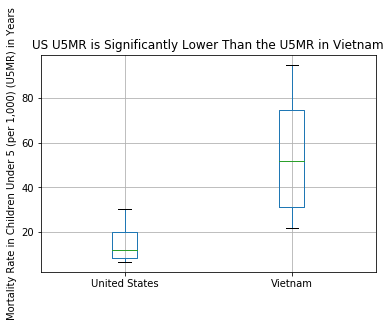

In [36]:
# Now let's plot a boxplot over the variables to see how large of a difference there is between the countries
ax = dft_u5mr[['United States', 'Vietnam']].boxplot()
ax.set_ylabel('Mortality Rate in Children Under 5 (per 1,000) (U5MR) in Years')
ax.set_title('US U5MR is Significantly Lower Than the U5MR in Vietnam')

In [38]:
# write stats summaries here
dft_u5mr.describe()

Country,United States,Vietnam
count,56.000000,52.000000
mean,14.564286,53.759615
std,7.374783,23.703870
min,6.500000,21.700000
25%,8.275000,31.150000
50%,12.050000,51.800000
75%,19.925000,74.550000
max,30.100000,95.000000


In [81]:
# US u5mr standard error (se)
print('The se of US u5mr is:')
print(np.std(dft_u5mr['United States'], ddof=1) /
      np.sqrt(len(dft_le['United States'])))
print()  # empty line to view it all beter

# Vietnam u5mr standard error (se)
print('The se of Vietnam u5mr is:')
print(np.std(dft_u5mr['Vietnam'], ddof=1) / np.sqrt(len(dft_le['Vietnam'])))
print()

# t-test
print('The US vs Vietnam t-test results are:')
print(ttest_ind(dft_u5mr['United States'].dropna(),
                dft_u5mr['Vietnam'].dropna(), equal_var=False))

The se of US u5mr is:
0.9854968704327037

The se of Vietnam u5mr is:
3.1675628168968153

The US vs Vietnam t-test results are:
Ttest_indResult(statistic=-11.421598666750405, pvalue=1.0652040144148916e-16)


### Qualitatively and quantitatively it doesn't seem like there's a spike in the Vietnamese U5MR during the early 1970s. 

#### This means that the U5MR is not a good indicator of why the life expectancy dipped in the early 1970s. This suggests that the dip in life expectancy is not due to increased children deaths, but may be due to the Vietnamese war killing more people in their adulthood.

According to the statistics calculations I did above, the US U5MR is, on average for 1960-2015, significantly lower than the U5MR in Vietnam. The standard deviations and standard errors calculated here show that Vietnam and the US do not have an overlap in U5MR and are statistically different from one another. The p-value is smaller than 0.05 and we can conclude that the US U5MR is significantly lower than the U5MR of Vietnam.

Due to these calculations, I can make the guess that David's chances of having died before he reached the age of 5 is much different from the chances he would have had if he had been born in Vietnam in 1992 instead of the US. It's a good thing he wasn't born in Vietnam then!

But really, 53.76 sounds like a very high U5MR. I needed to remind myself that the units are per 1000. This means that for the years 1960-2015, on average, about 54/1000 children died before the age of 5. This comes out to a 5.4% chance that an average Vietnamese child would not survive to the age of 5. That seems like a low number--not as low as the US, which would be 1.5% U5MR, but low nonetheless. 

We noticed that both the countries declined in U5MR by the early 1990s, so he probably would have been fine anyway.

#### In fact, both countries seem to have a steady decline in the U5MR as time progresses. Is this normal?

Text(0.5,1,'U5MR Decreases with Time for All Countries')

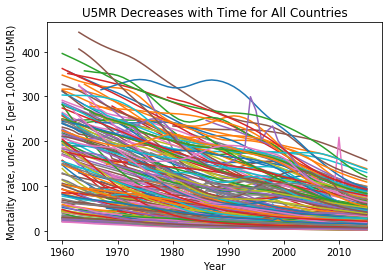

In [82]:
# make a data frame for one u5mr indicator and all countries possible
df_u5mr = df.drop(['Country Code', 'Indicator Code', 'Unnamed: 60'], axis=1)
df_u5mr = pd.melt(df_u5mr, id_vars=[
                  'Country Name', 'Indicator Name'], var_name='Year')
df_u5mr.rename(columns={'Country Name': 'Country'}, inplace=True)
df_u5mr.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
df_u5mr = df_u5mr[df_u5mr['Indicator'] ==
                  'Mortality rate, under-5 (per 1,000)']
df_u5mr = df_u5mr.pivot(index='Year', columns='Country', values='value')
df_u5mr.index = df_u5mr.index.astype(int)

# plot and rename axes
ax = df_u5mr.plot(legend=False)
ax.set_ylabel('Mortality rate, under- 5 (per 1,000) (U5MR)')
ax.set_title('U5MR Decreases with Time for All Countries')


Ok yes, as we look at the general trend of all countries (indicated by the colored lines on the graph), we can see this is a normal trend to have the U5MR decreas as time progresses. This could be correlated to increased healthcare quality, increased access to healthcare, increased immunizations, etc. 

Note: there are some countries that have spikes in the mid 1990's and near 2010. As I looked into it, I saw that they are due to genocides that happened in Rwanda and other countries during those years.

# * Is there a correlation between life expectancy and U5MR?

To check this, I will make a plot to show the data that compares life expectancy at birth (years) to mortality rate, under-5 (per 1,000). 
- We will look at all the countries possible for 1972. 
I picked this date because it is during that low point for Vietnam's life expectancy. I chose to look at all countries so I could see if Vietnam acts as an outlier from what is normally expected on a global scale. Is there a trend?

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0.5,1,'As Life Expectancy (years) for the Total Population Increases, the Mortality Rate in Children Under-5 (per 1,000) Decreases')

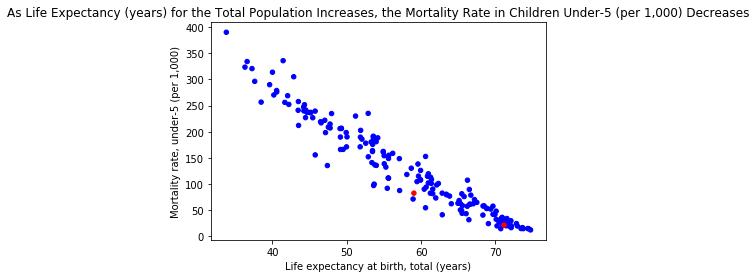

In [47]:
# make a new data frame with two indeces (le and u5mr) and all countries possible
Indicator = ['Life expectancy at birth, total (years)',
             'Mortality rate, under-5 (per 1,000)']
dft_u5mrvl = df[df['Indicator Name'].isin(Indicator)]
dft_u5mrvl.rename(columns={'Country Name': 'Country'}, inplace=True)
dft_u5mrvl.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft_u5mrvl.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
dft_u5mrvl = pd.melt(dft_u5mrvl, id_vars=[
                     'Country', 'Indicator'], var_name='Year')
# chose a year and pivot the data table on that year
dft_u5mrvl = dft_u5mrvl[dft_u5mrvl['Year'] == '1972']
dft_u5mrvl = dft_u5mrvl.pivot(
    index='Country', columns='Indicator', values='value').dropna()

# rename the axes and color the countries of interest red
dft_u5mrvl['color'] = dft_u5mrvl.index
dft_u5mrvl['color'] = dft_u5mrvl['color'].map(
    {'United States': 'Red', 'Vietnam': 'Red'}).fillna('Blue')
ax = dft_u5mrvl.plot.scatter(x='Life expectancy at birth, total (years)',
                             y='Mortality rate, under-5 (per 1,000)', c=dft_u5mrvl['color'])
ax.set_title('As Life Expectancy (years) for the Total Population Increases, the Mortality Rate in Children Under-5 (per 1,000) Decreases')

In [83]:
# Check for Pearson Correlation
rho_u5mrvl, p_u5mrvl = pearsonr(
    dft_u5mrvl[('Life expectancy at birth, total (years)')].dropna(), dft_u5mrvl[('Mortality rate, under-5 (per 1,000)')].dropna())
print('The Pearson Correlation results are:')
print(rho_u5mrvl, p_u5mrvl)

The Pearson Correlation results are:
-0.9665562688912545 1.0055405229369404e-107


##### Vietnam is not an outlier
The graph above shows qualitatively that there is a seemingly strong negative correlation between life expectancy at birth and mortality rate in the under-5 population. This means that __as life expectancy increases, the U5MR decreases.__ The strength of this correlation was confirmed by the Pearson Correlation test. Rho is -0.97 and the p-value is 1.0e-107. That is a number much smaller than 0.05, and thus we can conclude that there is a statistically significant correlation between the two indicators of health.

The two red dots represent Vietnam (red dot on left) and the United States (other red dot).
This scatter plot puts it into perspective that many more countries had lower life expectancies and higher U5MR's than Vietnam. 
Both countries seem to be within a reasonable distance away from the line of best fit. I would conclude that Vietnam is not a weird outlier during 1972, despite how low the life expectancy got.

#### So, why is that?
The first piece of data we have for Vietnam's Mortality Rate, under-5 is in 1966, when the mortality rate was 91.8 deaths for every 1,000 children. As time increased, that U5MR decreased. This c ould be due to many factors that are interesting to explore.

# * Is it possible that immunizations in children under-5 could have helped to decrease the mortality rate of children under-5?

According to this 30 year study done by Dr. Jit et. al. in 2015, there was an increase in immunizations in Vietnam after the 1970s. This is because the World Health Organization (WHO)'s Expanded Programme on Immunization (EPI) aimed to support countries in increasing uptake of vaccines against measles, diphtheria, pertussis, tetanus, poliomyelitis and tuberculosis. As such, I will look at diphtheria–pertussis–tetanus (DPT), measles, and pol3 immunization data. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4428532/

Text(0.5,1.08,'Immunization, Pol3 (% of one-year-old children)is More Prevalent in US than Vietnam')

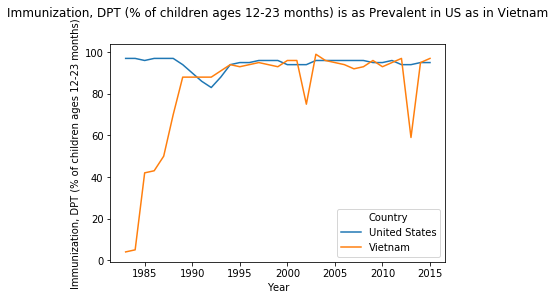

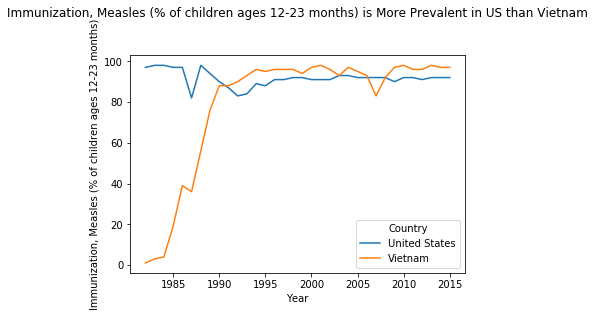

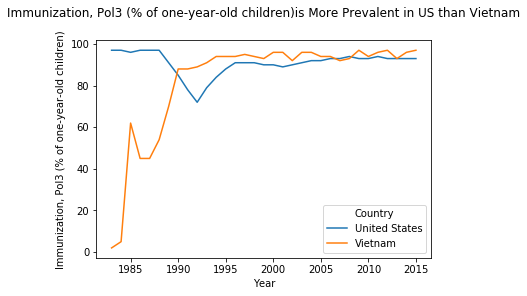

In [93]:
# make plots to show immunization prevalence over time

#'Immunization, DPT (% of children ages 12-23 months)'
dft_dpt = dft[dft['Indicator'] ==
              'Immunization, DPT (% of children ages 12-23 months)']
dft_dpt = dft_dpt.pivot(index='Year', columns='Country',
                        values='value').dropna()
dft_dpt.index = dft_dpt.index.astype(int)

ax = dft_dpt.plot()
ax.set_ylabel('Immunization, DPT (% of children ages 12-23 months)')
ax.set_title(
    'Immunization, DPT (% of children ages 12-23 months) is as Prevalent in US as in Vietnam', y=1.1)

#'Immunization, measles (% of children ages 12-23 months)'
dft_m = dft[dft['Indicator'] ==
            'Immunization, measles (% of children ages 12-23 months)']
dft_m = dft_m.pivot(index='Year', columns='Country', values='value').dropna()
dft_m.index = dft_m.index.astype(int)

bx = dft_m.plot()
bx.set_ylabel('Immunization, Measles (% of children ages 12-23 months)')
bx.set_title(
    'Immunization, Measles (% of children ages 12-23 months) is More Prevalent in US than Vietnam', y=1.15)

#'Immunization, Pol3 (% of one-year-old children)'
dft_p3 = dft[dft['Indicator'] ==
             'Immunization, Pol3 (% of one-year-old children)']
dft_p3 = dft_p3.pivot(index='Year', columns='Country', values='value').dropna()
dft_p3.index = dft_p3.index.astype(int)

cx = dft_p3.plot()
cx.set_ylabel('Immunization, Pol3 (% of one-year-old children)')
cx.set_title(
    'Immunization, Pol3 (% of one-year-old children)is More Prevalent in US than Vietnam', y=1.08)

Generally, the US has much higher immunization prevelance in children under 2 years old than Vietnam between the years 1980-1990. Then after that, they are about equal. There is a qualitative trend of the Vietnamese immunization prevelance being higher, with larger dips than the consistently high US immunization prevalence. 

Let's look at some statistics to make sure:

In [54]:
# stats summary for Immunization of DPT
dft_dpt.describe()

Country,United States,Vietnam
count,33.000000,33.000000
mean,94.424242,81.454545
std,3.192083,25.282270
min,83.000000,4.000000
25%,94.000000,88.000000
50%,95.000000,93.000000
75%,96.000000,95.000000
max,97.000000,99.000000


In [55]:
# stats summary for Immunization of  Measles
dft_m.describe()

Country,United States,Vietnam
count,34.000000,34.000000
mean,91.647059,79.088235
std,3.868148,30.940184
min,82.000000,1.000000
25%,91.000000,84.250000
50%,92.000000,94.500000
75%,92.750000,96.000000
max,98.000000,98.000000


In [56]:
# stats summary for Immunization of  Pol3
dft_p3.describe()

Country,United States,Vietnam
count,33.000000,33.000000
mean,90.818182,82.484848
std,5.675906,25.112399
min,72.000000,2.000000
25%,90.000000,88.000000
50%,92.000000,94.000000
75%,93.000000,96.000000
max,97.000000,97.000000


In [97]:
# adding the standard error (se) and t-test results here
# DPT
# US DPT standard error (se)
print('The US DPT se is:')
print(np.std(dft_dpt['United States'], ddof=1) /
      np.sqrt(len(dft_dpt['United States'])))
print()

# Vietnam DPT standard error (se)
print('The Vietnam DPT se is:')
print(np.std(dft_dpt['Vietnam'], ddof=1) / np.sqrt(len(dft_dpt['Vietnam'])))
print()

# Check for Pearson Correlation
rho_dft_dpt, p_dft_dpt = pearsonr(
    dft_dpt[('Vietnam')].dropna(), dft_dpt[('United States')].dropna())
print('The Pearson Correlation results for DPT immunizations are:')
print(rho_dft_dpt, p_dft_dpt)
print()

# Measles
# US Meas standard error (se)
print('The US Measles se is:')
print(np.std(dft_m['United States'], ddof=1) /
      np.sqrt(len(dft_m['United States'])))
print()

# Vietnam Meas standard error (se)
print('The Vietnam Measles se is:')
print(np.std(dft_m['Vietnam'], ddof=1) / np.sqrt(len(dft_m['Vietnam'])))
print()

# Check for Pearson Correlation
rho_dft_m, p_dft_m = pearsonr(
    dft_m[('Vietnam')].dropna(), dft_m[('United States')].dropna())
print('The Pearson Correlation results for Measles immunizations are:')
print(rho_dft_m, p_dft_m)
print()

# Pol3
# US Pol3 standard error (se)
print('The US Pol3 se is:')
print(np.std(dft_p3['United States'], ddof=1) /
      np.sqrt(len(dft_p3['United States'])))
print()

# Vietnam Pol3 standard error (se)
print('The Vietnam Pol3 se is:')
print(np.std(dft_p3['Vietnam'], ddof=1) / np.sqrt(len(dft_p3['Vietnam'])))
print()

# Check for Pearson Correlation
rho_dft_p3, p_dft_p3 = pearsonr(
    dft_p3[('Vietnam')].dropna(), dft_p3[('United States')].dropna())
print('The Pearson Correlation results for Pol 3 immunizations are:')
print(rho_dft_p3, p_dft_p3)

The US DPT se is:
0.5556703279058257

The Vietnam DPT se is:
4.4010783176542905

The Pearson Correlation results for DPT immunizations are:
-0.2518349656233714 0.1574191144194944

The US Measles se is:
0.6633818624584314

The Vietnam Measles se is:
5.306197843678143

The Pearson Correlation results for Measles immunizations are:
-0.5081533049257595 0.002153328872636585

The US Pol3 se is:
0.9880484145129163

The Vietnam Pol3 se is:
4.371507526387193

The Pearson Correlation results for Pol 3 immunizations are:
-0.4121976155838696 0.017141419138984766


__The prevalence of Measles and Pol3 immunizations was higher in US than Vietnam.__ Sure, the Vietnamese population took around 10 years to catch up to the US, but regarless, there seems to be a significant difference between the two countries in terms of Measles and Pol3 vaccination prevalence. 
- I say this because of how the statistics calculations I did above show the means and overlapping standard deviations of the countries' U5MRs.
- Despite the overlapping standard deviations, the standard errors do not show overlap. 
- The p-values for Measles and Pol3 are less that 0.05, which suggests that there is a significant difference between the two countries.

__Both Vietnam and the US seem to have, on average, the same prevalence of DPT immunizations as each other.__
- Not only fo the standard deviations overlap, but the p-value is also 0.16, which is larger than the 0.05 accepted cut off for statistical significance.

This suggests to me that immunization popularity and trust increased in both countries around the same time, possibly due to the WHO's EPI movement I mentioned earlier. Hhowever, I cannot know the full story of the 55 year range between 1960-2015 because there is missing data for immunizations of both countries from 1960-1982. It would be good to find other sources of immunization data and redo this comparison. 

### Now, I'll make a some scatter plots to see if there's a trend between immunizations and life expectancy.
I assume that there would be a positive correlation between the two because immunizations supposedly prevent diseases that might lower that life expectancy number.

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\

Text(0.5,1,'As % of 1 yr-old Children that get Pol3 Immunizations Increases, the Life Expectancy Increases')

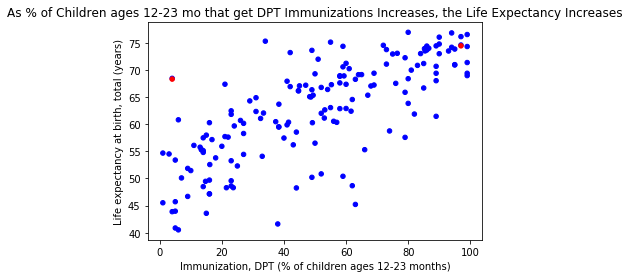

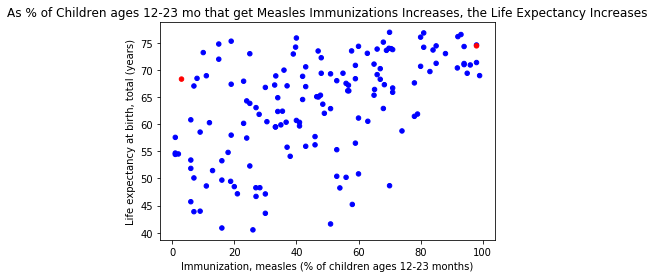

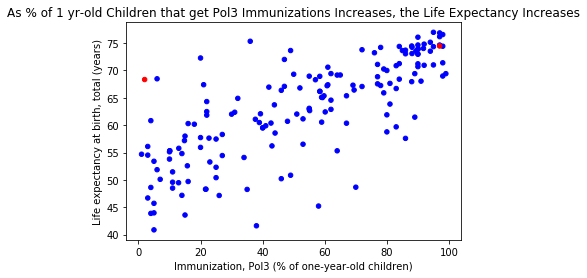

In [98]:
# DPT focused data frame and scatter plot (two countries of interest in red)
Indicator_dpt = ['Life expectancy at birth, total (years)',
                 'Immunization, DPT (% of children ages 12-23 months)']

dft_dptvl = df[df['Indicator Name'].isin(Indicator_dpt)]
dft_dptvl.rename(columns={'Country Name': 'Country'}, inplace=True)
dft_dptvl.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft_dptvl.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
dft_dptvl = pd.melt(dft_dptvl, id_vars=[
                    'Country', 'Indicator'], var_name='Year')

dft_dptvl = dft_dptvl[dft_dptvl['Year'] == '1983']
dft_dptvl = dft_dptvl.pivot(
    index='Country', columns='Indicator', values='value').dropna()
dft_dptvl['color'] = dft_dptvl.index
dft_dptvl['color'] = dft_dptvl['color'].map(
    {'United States': 'Red', 'Vietnam': 'Red'}).fillna('Blue')
ax = dft_dptvl.plot.scatter(x='Immunization, DPT (% of children ages 12-23 months)',
                            y='Life expectancy at birth, total (years)', c=dft_dptvl['color'])
ax.set_title(
    'As % of Children ages 12-23 mo that get DPT Immunizations Increases, the Life Expectancy Increases')

# Measles focused data frame and scatter plot (two countries of interest in red)
Indicator_m = ['Life expectancy at birth, total (years)',
               'Immunization, measles (% of children ages 12-23 months)']

dft_mvl = df[df['Indicator Name'].isin(Indicator_m)]
dft_mvl.rename(columns={'Country Name': 'Country'}, inplace=True)
dft_mvl.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft_mvl.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
dft_mvl = pd.melt(dft_mvl, id_vars=['Country', 'Indicator'], var_name='Year')

dft_mvl = dft_mvl[dft_mvl['Year'] == '1983']
dft_mvl = dft_mvl.pivot(
    index='Country', columns='Indicator', values='value').dropna()
dft_mvl['color'] = dft_mvl.index
dft_mvl['color'] = dft_mvl['color'].map(
    {'United States': 'Red', 'Vietnam': 'Red'}).fillna('Blue')
ax = dft_mvl.plot.scatter(x='Immunization, measles (% of children ages 12-23 months)',
                          y='Life expectancy at birth, total (years)', c=dft_mvl['color'])
ax.set_title(
    'As % of Children ages 12-23 mo that get Measles Immunizations Increases, the Life Expectancy Increases')

# Pol3 focused data frame and scatter plot (two countries of interest in red)
Indicator_p3 = ['Life expectancy at birth, total (years)',
                'Immunization, Pol3 (% of one-year-old children)']

dft_p3vl = df[df['Indicator Name'].isin(Indicator_p3)]
dft_p3vl.rename(columns={'Country Name': 'Country'}, inplace=True)
dft_p3vl.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft_p3vl.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
dft_p3vl = pd.melt(dft_p3vl, id_vars=['Country', 'Indicator'], var_name='Year')

dft_p3vl = dft_p3vl[dft_p3vl['Year'] == '1983']
dft_p3vl = dft_p3vl.pivot(
    index='Country', columns='Indicator', values='value').dropna()
dft_p3vl['color'] = dft_p3vl.index
dft_p3vl['color'] = dft_p3vl['color'].map(
    {'United States': 'Red', 'Vietnam': 'Red'}).fillna('Blue')
ax = dft_p3vl.plot.scatter(x='Immunization, Pol3 (% of one-year-old children)',
                           y='Life expectancy at birth, total (years)', c=dft_p3vl['color'])
ax.set_title(
    'As % of 1 yr-old Children that get Pol3 Immunizations Increases, the Life Expectancy Increases')

In [115]:
# correlation
rho_dft_dptvl, p_dft_dptvl = pearsonr(dft_dptvl['Immunization, DPT (% of children ages 12-23 months)'],
                                      dft_dptvl['Life expectancy at birth, total (years)'])

rho_dft_mvl, p_dft_mvl = pearsonr(
    dft_mvl['Immunization, measles (% of children ages 12-23 months)'], dft_mvl['Life expectancy at birth, total (years)'])

rho_dft_p3vl, p_dft_p3vl = pearsonr(dft_p3vl['Immunization, Pol3 (% of one-year-old children)'],
                                    dft_p3vl['Life expectancy at birth, total (years)'])

print('The Pearson Correlation results for DPT immunizations are:')
print(rho_dft_dptvl, p_dft_dptvl)
print()
print('The Pearson Correlation results for Measles immunizations are:')
print(rho_dft_mvl, p_dft_mvl)
print()
print('The Pearson Correlation results for Pol3 immunizations are:')
print(rho_dft_p3vl, p_dft_p3vl)

The Pearson Correlation results for DPT immunizations are:
0.7394232237047137 3.7123336363034584e-30

The Pearson Correlation results for Measles immunizations are:
0.5254396139368533 5.979175708114361e-12

The Pearson Correlation results for Pol3 immunizations are:
0.7615618029081402 6.746098693179948e-33


According to the statistical Pearson Correlation, there are p-values lower than 0.05, meaning there is a significant relationship between the immunization prevalence and life expectancy.Generally, __as the countries increased in DPT, Measles, and Pol3 immunization prevalence, the life expectancies rose too__. There is a positive correlation between the two indicators. 
- I would expect, then, that regardless of David's country of birth, he would have an increased life expectancy if he got one or more of these three immunizations before he turned 2.

Since there is such a positive benefit of immunizations on life expectancy, I wonder if there is also a positive benefit of immunizations in decreasinf the U5MR.

# *Is it possible that immunizations in children under-5 could have helped to decrease the U5MR?
I'll make a plot to see a trend between immunizations and U5MR.

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\

Text(0.5,1,'In 1983, As % of 1 yr-old Children that get Pol3 Immunizations Increases, the U5MR Decreases')

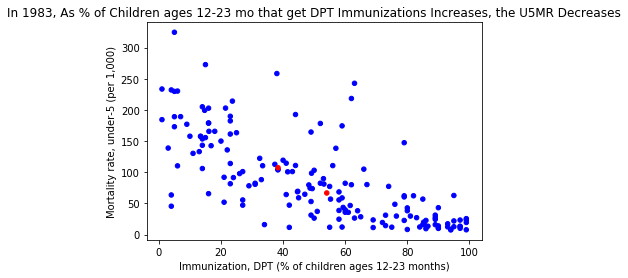

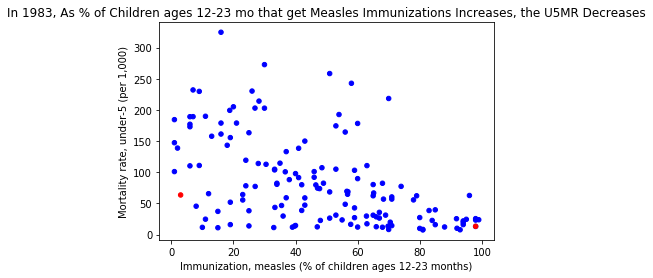

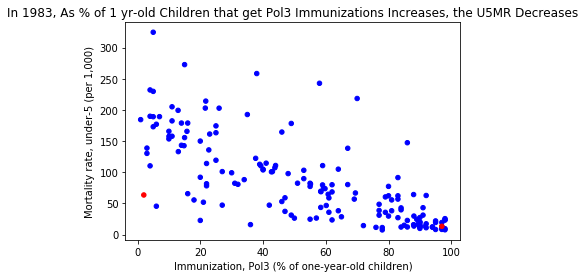

In [122]:
# DPT focused data frame and scatter plot (two countries of interest in red)
Indicator_dptvd = ['Mortality rate, under-5 (per 1,000)',
                   'Immunization, DPT (% of children ages 12-23 months)']

dft_dptvd = df[df['Indicator Name'].isin(Indicator_dptvd)]
dft_dptvd.rename(columns={'Country Name': 'Country'}, inplace=True)
dft_dptvd.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft_dptvd.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
dft_dptvd = pd.melt(dft_dptvd, id_vars=[
                    'Country', 'Indicator'], var_name='Year')

dft_dptvd = dft_dptvd[dft_dptvd['Year'] == '1983']
dft_dptvd = dft_dptvd.pivot(
    index='Country', columns='Indicator', values='value').dropna()
dft_dptvd['color'] = dft_dptvd.index
dft_dptvd['color'] = dft_dptvd['color'].map(
    {'United States': 'Red', 'Vietnam': 'Red'}).fillna('Blue')
ax = dft_dptvd.plot.scatter(x='Immunization, DPT (% of children ages 12-23 months)',
                            y='Mortality rate, under-5 (per 1,000)', c=dft_dptvl['color'])
ax.set_title(
    'In 1983, As % of Children ages 12-23 mo that get DPT Immunizations Increases, the U5MR Decreases')

# Measles focused data frame and scatter plot (two countries of interest in red)
Indicator_mvd = ['Mortality rate, under-5 (per 1,000)',
                 'Immunization, measles (% of children ages 12-23 months)']

dft_mvd = df[df['Indicator Name'].isin(Indicator_mvd)]
dft_mvd.rename(columns={'Country Name': 'Country'}, inplace=True)
dft_mvd.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft_mvd.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
dft_mvd = pd.melt(dft_mvd, id_vars=['Country', 'Indicator'], var_name='Year')

dft_mvd = dft_mvd[dft_mvd['Year'] == '1983']
dft_mvd = dft_mvd.pivot(
    index='Country', columns='Indicator', values='value').dropna()
dft_mvd['color'] = dft_mvd.index
dft_mvd['color'] = dft_mvd['color'].map(
    {'United States': 'Red', 'Vietnam': 'Red'}).fillna('Blue')
ax = dft_mvd.plot.scatter(x='Immunization, measles (% of children ages 12-23 months)',
                          y='Mortality rate, under-5 (per 1,000)', c=dft_mvd['color'])
ax.set_title(
    'In 1983, As % of Children ages 12-23 mo that get Measles Immunizations Increases, the U5MR Decreases')

# Pol3 focused data frame and scatter plot (two countries of interest in red)
Indicator_p3vd = ['Mortality rate, under-5 (per 1,000)',
                  'Immunization, Pol3 (% of one-year-old children)']

dft_p3vd = df[df['Indicator Name'].isin(Indicator_p3vd)]
dft_p3vd.rename(columns={'Country Name': 'Country'}, inplace=True)
dft_p3vd.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft_p3vd.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
dft_p3vd = pd.melt(dft_p3vd, id_vars=['Country', 'Indicator'], var_name='Year')

dft_p3vd = dft_p3vd[dft_p3vd['Year'] == '1983']
dft_p3vd = dft_p3vd.pivot(
    index='Country', columns='Indicator', values='value').dropna()
dft_p3vd['color'] = dft_p3vd.index
dft_p3vd['color'] = dft_p3vd['color'].map(
    {'United States': 'Red', 'Vietnam': 'Red'}).fillna('Blue')
ax = dft_p3vd.plot.scatter(x='Immunization, Pol3 (% of one-year-old children)',
                           y='Mortality rate, under-5 (per 1,000)', c=dft_p3vd['color'])
ax.set_title(
    'In 1983, As % of 1 yr-old Children that get Pol3 Immunizations Increases, the U5MR Decreases')

In [117]:
# correlation
rho_dpt, p_dpt = pearsonr(dft_dptvd['Immunization, DPT (% of children ages 12-23 months)'],
                          dft_dptvd['Mortality rate, under-5 (per 1,000)'])
rho_meas, p_meas = pearsonr(
    dft_mvd['Immunization, measles (% of children ages 12-23 months)'], dft_mvd['Mortality rate, under-5 (per 1,000)'])
rho_pol, p_pol = pearsonr(dft_p3vd['Immunization, Pol3 (% of one-year-old children)'],
                          dft_p3vd['Mortality rate, under-5 (per 1,000)'])
print('The Pearson Correlation results for DPT immunizations are:')
print(rho_dpt, p_dpt)
print()
print('The Pearson Correlation results for Measles immunizations are:')
print(rho_meas, p_meas)
print()
print('The Pearson Correlation results for Pol3 immunizations are:')
print(rho_pol, p_pol)

The Pearson Correlation results for DPT immunizations are:
-0.7286698899143697 9.295409151566798e-29

The Pearson Correlation results for Measles immunizations are:
-0.5202112432796075 1.448309314810464e-11

The Pearson Correlation results for Pol3 immunizations are:
-0.7405792264407216 4.049833233516761e-30


There is a strong negative correlation between immunization and U5MR. We see that __as DPT, Measles, and Pol3 immunization prevalence rose, there was a decrease in U5MR__. We know this because the Pearson Correlation results gave p-values that were lower than 0.05.

## Immunizations can be good predictors for affecting the U5MR.
The very small p-values mean that U5MR must be a function of immunizations and other health factors. Let's compare the p-values and scatter plots from these graphs above that looked at 1983, and see if there's an even tighter regression fit for a more recent date.

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\

Text(0.5,1,'In 2015, As % of 1 yr-old Children that get Pol3 Immunizations Increases, the U5MR Decreases')

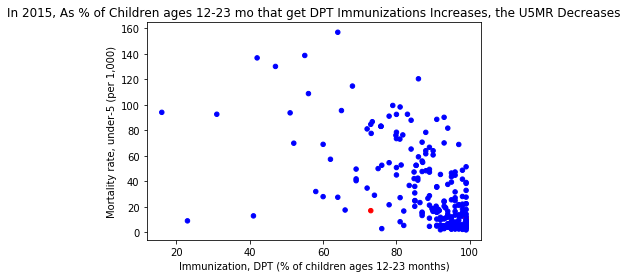

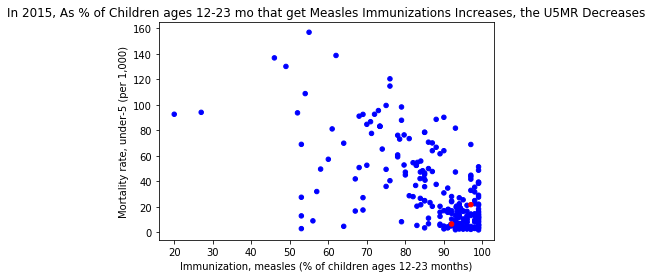

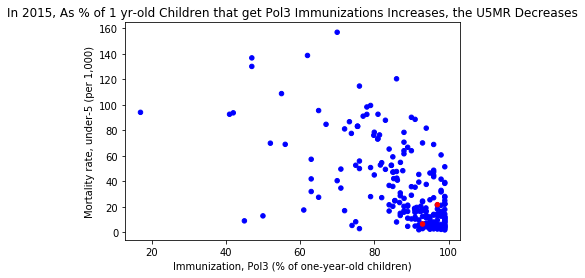

In [121]:
# DPT focused data frame and scatter plot (two countries of interest in red)
Indicator_dptvd = ['Mortality rate, under-5 (per 1,000)',
                   'Immunization, DPT (% of children ages 12-23 months)']

dft_dptvd = df[df['Indicator Name'].isin(Indicator_dptvd)]
dft_dptvd.rename(columns={'Country Name': 'Country'}, inplace=True)
dft_dptvd.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft_dptvd.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
dft_dptvd = pd.melt(dft_dptvd, id_vars=[
                    'Country', 'Indicator'], var_name='Year')

dft_dptvd = dft_dptvd[dft_dptvd['Year'] == '2015']
dft_dptvd = dft_dptvd.pivot(
    index='Country', columns='Indicator', values='value').dropna()
dft_dptvd['color'] = dft_dptvd.index
dft_dptvd['color'] = dft_dptvd['color'].map(
    {'United States': 'Red', 'Vietnam': 'Red'}).fillna('Blue')
ax = dft_dptvd.plot.scatter(x='Immunization, DPT (% of children ages 12-23 months)',
                            y='Mortality rate, under-5 (per 1,000)', c=dft_dptvl['color'])
ax.set_title(
    'In 2015, As % of Children ages 12-23 mo that get DPT Immunizations Increases, the U5MR Decreases')

# Measles focused data frame and scatter plot (two countries of interest in red)
Indicator_mvd = ['Mortality rate, under-5 (per 1,000)',
                 'Immunization, measles (% of children ages 12-23 months)']

dft_mvd = df[df['Indicator Name'].isin(Indicator_mvd)]
dft_mvd.rename(columns={'Country Name': 'Country'}, inplace=True)
dft_mvd.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft_mvd.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
dft_mvd = pd.melt(dft_mvd, id_vars=['Country', 'Indicator'], var_name='Year')

dft_mvd = dft_mvd[dft_mvd['Year'] == '2015']
dft_mvd = dft_mvd.pivot(
    index='Country', columns='Indicator', values='value').dropna()
dft_mvd['color'] = dft_mvd.index
dft_mvd['color'] = dft_mvd['color'].map(
    {'United States': 'Red', 'Vietnam': 'Red'}).fillna('Blue')
ax = dft_mvd.plot.scatter(x='Immunization, measles (% of children ages 12-23 months)',
                          y='Mortality rate, under-5 (per 1,000)', c=dft_mvd['color'])
ax.set_title(
    'In 2015, As % of Children ages 12-23 mo that get Measles Immunizations Increases, the U5MR Decreases')

# Pol3 focused data frame and scatter plot (two countries of interest in red)
Indicator_p3vd = ['Mortality rate, under-5 (per 1,000)',
                  'Immunization, Pol3 (% of one-year-old children)']

dft_p3vd = df[df['Indicator Name'].isin(Indicator_p3vd)]
dft_p3vd.rename(columns={'Country Name': 'Country'}, inplace=True)
dft_p3vd.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft_p3vd.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
dft_p3vd = pd.melt(dft_p3vd, id_vars=['Country', 'Indicator'], var_name='Year')

dft_p3vd = dft_p3vd[dft_p3vd['Year'] == '2015']
dft_p3vd = dft_p3vd.pivot(
    index='Country', columns='Indicator', values='value').dropna()
dft_p3vd['color'] = dft_p3vd.index
dft_p3vd['color'] = dft_p3vd['color'].map(
    {'United States': 'Red', 'Vietnam': 'Red'}).fillna('Blue')
ax = dft_p3vd.plot.scatter(x='Immunization, Pol3 (% of one-year-old children)',
                           y='Mortality rate, under-5 (per 1,000)', c=dft_p3vd['color'])
ax.set_title(
    'In 2015, As % of 1 yr-old Children that get Pol3 Immunizations Increases, the U5MR Decreases')

In [120]:
# correlation for 2015
rho_dpt, p_dpt = pearsonr(dft_dptvd['Immunization, DPT (% of children ages 12-23 months)'],
                          dft_dptvd['Mortality rate, under-5 (per 1,000)'])
rho_meas, p_meas = pearsonr(
    dft_mvd['Immunization, measles (% of children ages 12-23 months)'], dft_mvd['Mortality rate, under-5 (per 1,000)'])
rho_pol, p_pol = pearsonr(dft_p3vd['Immunization, Pol3 (% of one-year-old children)'],
                          dft_p3vd['Mortality rate, under-5 (per 1,000)'])
print('The Pearson Correlation results for DPT immunizations in 2015 are:')
print(rho_dpt, p_dpt)
print()
print('The Pearson Correlation results for Measles immunizations in 2015 are:')
print(rho_meas, p_meas)
print()
print('The Pearson Correlation results for Pol3 immunizations in 2015 are:')
print(rho_pol, p_pol)

The Pearson Correlation results for DPT immunizations in 2015 are:
-0.5841021889193655 1.0412670603144841e-22

The Pearson Correlation results for Measles immunizations in 2015 are:
-0.6330099276845207 1.7111636899062483e-27

The Pearson Correlation results for Pol3 immunizations in 2015 are:
-0.6061331185416932 9.216670089682833e-25


Wow! So awesome! When we look at the scatter plots for year 2015 in comparison to the plots from year 1983, we can qualitatively see a large difference! More countries had higher immunization rates of DPT, Measles, and Pol3 and also had lower U5MRs. We can have confidence in that trend because the Pearson Correlation results all gave p-values that were much lower than 0.05.

So once again, we can say, __there is a strong negative correlation between immunization and U5MR. As DPT, Measles, and Pol3 immunization prevalence rose, there was a decrease in U5MR__. 


I would expect, then, that regardless of David's country of birth, he would have an _increased_ chance of surviving pasy age 5 if he got any one of these three immunizations before he turned 2.

### Can I make that claim though? Let's do some stats calculations with Bayes' Rule:

__What's the probability of a Vietnamese child surviving past the age of 5 if he does get the measles immunization in 1992?__

P(survives past the age of 5 | had measles immunization in Vietnam in 1992) = P(had measles immunization in Vietnam in 1992 | survives past the age of 5) P(survives past the age of 5) / P(survives past the age of 5) P(had measles immunization in Vietnam in 1992 | survives past the age of 5) + P(N-survives past the age of 5) * P(had measles immunization in Vietnam in 1992 | N-survives past the age of 5)

__What's the probability of a Vietnamese child dying before the age of 5 if he does get the measles immunization in 1992?__

P(N-survives past the age of 5 | had measles immunization in Vietnam in 1992) = 1 - P(survives past the age of 5 | had measles immunization in Vietnam in 1992)

### Aww sad, I don't have all the info I need to do such a calculation. 
I need to know how many kids who lived past age 5 got the immunization and how many kids who died before the age of 5 got the immunization.

### Well, what other kinds of health indicators might be good predictors for U5MR?
Like the immunizations, maybe there are other health indicators that could be good predictors because they are administered to children when they are young. Let's take a look at Vitamin A supplementation coverate rates for children ages 6-59 months and compare the correlation with the immunizations we already looked at.

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'In 2015, As % of Children ages 12-23 mo that get DPT Immunizations Increases, the Vitamin A Supplementation Coverage Rate')

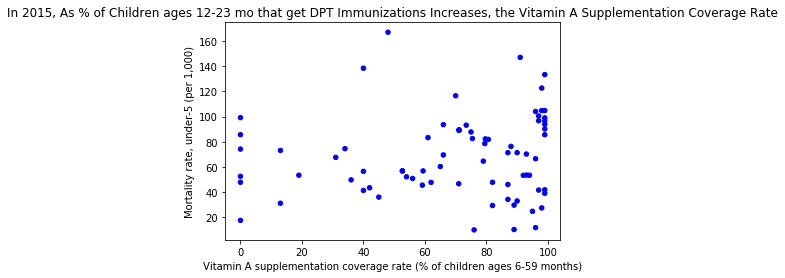

In [134]:
# 'Vitamin A supplementation coverage rate (% of children ages 6-59 months)' focused data frame and scatter plot (two countries of interest in red)
Indicator_A = ['Mortality rate, under-5 (per 1,000)',
               'Vitamin A supplementation coverage rate (% of children ages 6-59 months)']

dft_A = df[df['Indicator Name'].isin(Indicator_A)]
dft_A.rename(columns={'Country Name': 'Country'}, inplace=True)
dft_A.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
dft_A.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
dft_A = pd.melt(dft_A, id_vars=[
    'Country', 'Indicator'], var_name='Year')

dft_A = dft_A[dft_A['Year'] == '2013']
dft_A = dft_A.pivot(
    index='Country', columns='Indicator', values='value').dropna()
dft_A['color'] = dft_A.index
dft_A['color'] = dft_A['color'].map(
    {'United States': 'Red', 'Vietnam': 'Red'}).fillna('Blue')
dft_A.head()
ax = dft_A.plot.scatter(x='Vitamin A supplementation coverage rate (% of children ages 6-59 months)',
                        y='Mortality rate, under-5 (per 1,000)', c=dft_A['color'])
ax.set_title('In 2015, As % of Children ages 12-23 mo that get DPT Immunizations Increases, the Vitamin A Supplementation Coverage Rate')

In [137]:
# correlation for 2013
rho_A, p_A = pearsonr(dft_A['Vitamin A supplementation coverage rate (% of children ages 6-59 months)'],
                      dft_A['Mortality rate, under-5 (per 1,000)'])
print('The Pearson Correlation results are:')
print(rho_A, p_A)

The Pearson Correlation results are:
0.10303625600108911 0.3757668613563543


It looks like there is __no significant correlation between Vitamin A supplementation coverage rates and U5MR.__ We know this because the Pearson Correlation result gave a p-value that was 0.38, which is higher than 0.05. This further gives me confidence that __DPT, Measles, and Pol3 Immunizations given before the age of 2 are imporant determinants of U5MR.__

# Future Research

This data set has some interesting spikes and dips in the various health indicators that could be eplored further. My research project mostly  focused on two countries (US and Vietnam) and how those two countries performed against each other and against the backdrop of other countries around the world. __Further research could be done to investigate how the life expectancy, U5MR, and immunization prevalence indicators could interact for more countries.__

In terms of continuing to look at Vietnam and the United States, if __more data__ could be collected to understand the immunization practices of the countries from 1960-1982, then a __better visual and statistical conclusion could be re-drawn about how the two countries really compare over a larger range of time.__

If we could get more data regarding the probability of children under 5 and had immunizations and/or the probability of children who did not live past the age of 5 and had immunizations, then, using Bayes' Rule, __we could predict the liklihood of the survival of a child who got immunizations.__

Lastly, further research could be done to elucidate __what other health indicators could be good predictors of a country's U5MR.__